In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [4]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings

In [27]:
df =pd.read_csv('creditcard.csv')

In [28]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [31]:
df.shape

(284807, 31)

In [32]:
# Checcking if any null values are present or not
df.isnull().sum().max()

0

In [33]:
print("percentage of non froud is", round(df['Class'].value_counts()[0]/len(df)* 100,2), "%")
print("percentage of froud is", round(df['Class'].value_counts()[1]/len(df)* 100,2), "%")

percentage of non froud is 99.83 %
percentage of froud is 0.17 %


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

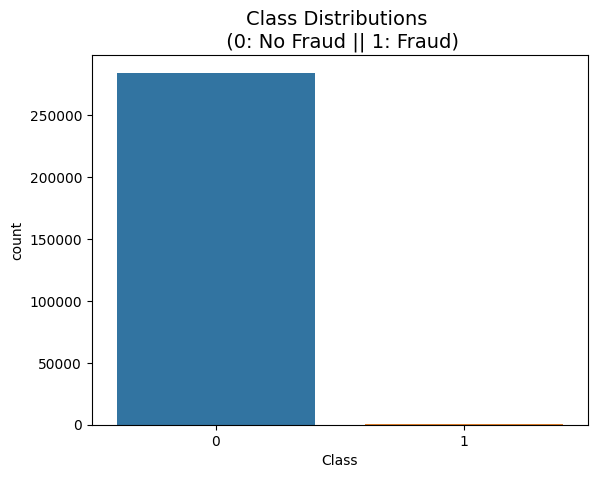

In [34]:
# Plot the Class Distribution

colors = ["#0101DF", "#DF0101"]
sns.countplot(x = df["Class"])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


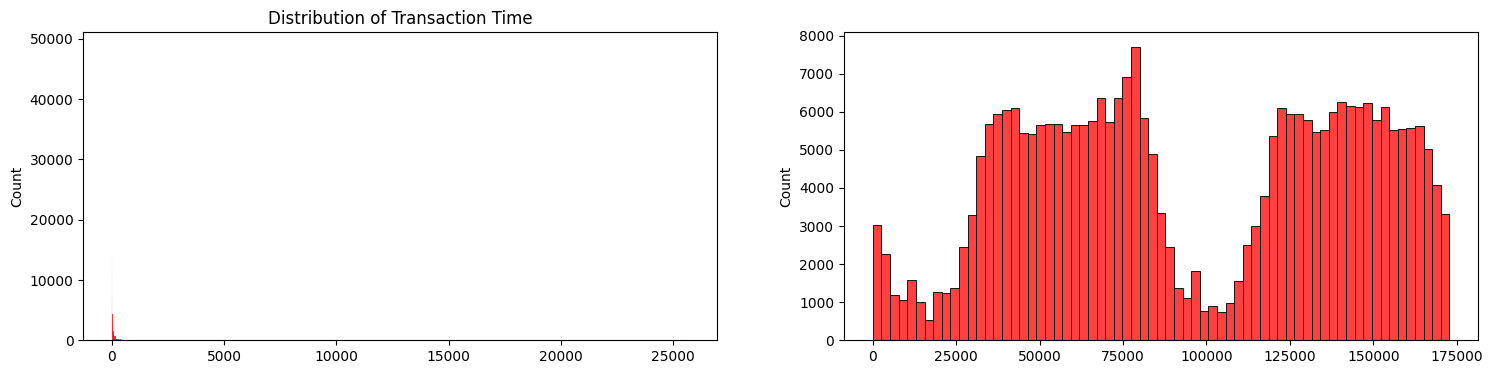

In [35]:
fix, ax = plt.subplots(1,2, figsize =(18,4))

val = df['Amount'].values
tim = df['Time'].values

sns.histplot(val, ax = ax[0], color ='r')
ax[0].set_title('Distribution of Transaction Amount')

sns.histplot(tim, ax = ax[1], color = 'r')
ax[0].set_title('Distribution of Transaction Time')

plt.show()


In [36]:
def detect_outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return [x for x in data if x < lower_bound or x > upper_bound]

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
outliers = detect_outliers(data)
print(outliers) # prints [100]


[100]


In [38]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [39]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

from sklearn.preprocessing import StandardScaler, RobustScaler



df["time_rob_scales"] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
df['amount_rob_scaled'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))


In [40]:
df.drop(['Time','Amount'], axis = 1, inplace = True)

In [41]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,time_rob_scales,amount_rob_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [42]:
scaled_time = df['time_rob_scales']
scaled_amount = df['amount_rob_scaled']
df.rename(columns={'time_rob_scales': 'scaled_time', 'amount_rob_scaled': 'scaled_amount'}, inplace=True)

In [43]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [44]:
df.shape

(284807, 31)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


print("percentage of non froud is", round(df['Class'].value_counts()[0]/len(df)* 100,2), "%")
print("percentage of froud is", round(df['Class'].value_counts()[1]/len(df)* 100,2), "%")

x = df.drop("Class", axis =1)
y = df['Class']

percentage of non froud is 99.83 %
percentage of froud is 0.17 %


In [54]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.994960,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,1.034951,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,1.034963,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,1.034975,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,1.034975,-0.167680


In [57]:
sss = StratifiedKFold(n_splits=5, random_state= None, shuffle= False)

for train_index, test_index in sss.split(x,y):
    print("Train: ", train_index, "Test: ", test_index)
    original_xtrain, original_xtest = x.iloc[train_index],x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index],y.iloc[test_index]

Train:  [ 30473  30496  31002 ... 284804 284805 284806] Test:  [    0     1     2 ... 57017 57018 57019]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train:  [     0      1      2 ... 227866 227867 227868] Test:  [212516 212644 213092 ... 284804 284805 284806]


In [61]:
print(original_ytrain.value_counts())
print(original_ytest.value_counts())

0    227452
1       394
Name: Class, dtype: int64
0    56863
1       98
Name: Class, dtype: int64


In [66]:
len(original_ytrain)

227846

In [68]:
print(len(original_ytrain)/ len(original_ytest))
print(len(original_xtrain)/ len(original_xtest))

4.000035111743123
4.000035111743123


In [69]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [70]:
np.unique(df['Class'].values, return_counts= True)

(array([0, 1], dtype=int64), array([284315,    492], dtype=int64))

In [71]:
np.unique(original_ytrain, return_counts= True)

(array([0, 1], dtype=int64), array([227452,    394], dtype=int64))

In [77]:
df.shape

(284807, 31)

In [135]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
91406,-0.797093,0.683645,1.572596,0.348139,0.036879,0.353994,0.936242,-0.155086,-0.356116,-0.615034,...,0.118297,-0.301946,-0.333943,0.593425,0.716963,-0.042412,0.034127,0,-0.249510,1.089779
15506,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,-8.650758,...,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,1,-0.678967,1.089779
268151,-0.794100,0.073718,-0.794628,-1.134463,0.512720,-0.233948,-0.000552,0.340692,-1.253210,0.412939,...,0.976377,-0.329222,0.239937,-0.264034,0.018783,-0.191870,0.171800,0,0.920958,-0.121428
42674,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,...,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1,-0.511026,-0.286173
156988,0.745153,2.809299,-5.825406,5.835566,0.512320,-0.615622,-2.916576,0.776710,-1.878832,-4.546936,...,-0.874383,-0.083995,-0.651442,0.454594,0.050376,0.756953,0.383869,1,0.289066,-0.307413


In [87]:
new_df.shape

(984, 31)

In [88]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [89]:
new_df['Class']

281215    0
251881    1
260023    0
42007     1
92777     1
         ..
120837    1
6329      1
116645    0
68320     1
64460     1
Name: Class, Length: 984, dtype: int64

Distribution of class in the new df
0    492
1    492
Name: Class, dtype: int64
0    0.5
1    0.5
Name: Class, dtype: float64


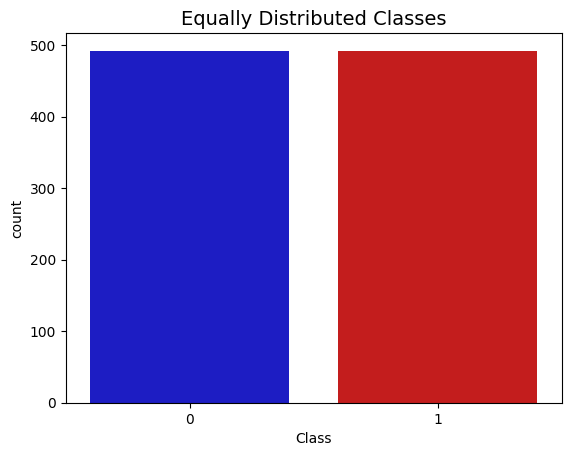

In [90]:
print("Distribution of class in the new df")
print(new_df['Class'].value_counts())
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x= 'Class',data= new_df,  palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

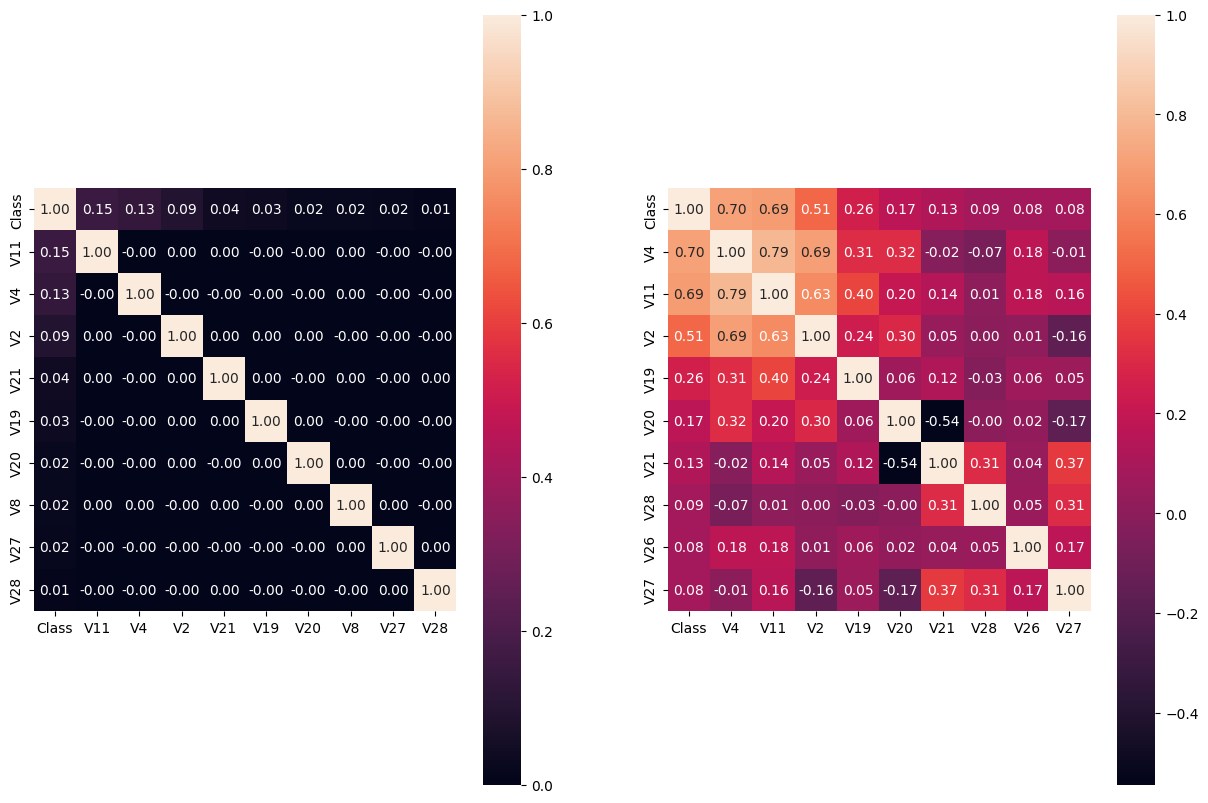

In [108]:
f , (ax1, ax2) = plt.subplots(1,2, figsize = (15,10))

# Correlation of entire datasetbbbb

corr_1 = df.corr()
k = 10
cols = corr_1.nlargest(k, 'Class')['Class'].index

cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax =ax1)


corr = new_df.corr()
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(new_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax =ax2)
plt.show()

In [32]:
# Find variables which are highly correlated with the class object

corr[corr['Class']<0]['Class'].sort_values().head(3)

V17   -0.326481
V14   -0.302544
V12   -0.260593
Name: Class, dtype: float64

In [122]:
# Boxplot for variables which are highly correlater for new_df
corr_1 = new_df.corr()
k = 10
cols = corr_1.nlargest(k, 'Class')['Class'].index.tolist()
cols.remove('Class')
print(cols)
print(len(cols))

['V4', 'V11', 'V2', 'V19', 'V20', 'V21', 'V28', 'V26', 'V27']
9


In [125]:
for i in cols:
    print(i)

V4
V11
V2
V19
V20
V21
V28
V26
V27


In [139]:
x = pd.DataFrame(new_df)

In [142]:
x.reset_index(inplace = True)

In [146]:
x.head()

,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,91406,-0.797093,0.683645,1.572596,0.348139,0.036879,0.353994,0.936242,-0.155086,-0.356116,...,0.118297,-0.301946,-0.333943,0.593425,0.716963,-0.042412,0.034127,0,-0.249510,1.089779
1,15506,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,...,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,1,-0.678967,1.089779
2,268151,-0.794100,0.073718,-0.794628,-1.134463,0.512720,-0.233948,-0.000552,0.340692,-1.253210,...,0.976377,-0.329222,0.239937,-0.264034,0.018783,-0.191870,0.171800,0,0.920958,-0.121428
3,42674,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1,-0.511026,-0.286173
4,156988,0.745153,2.809299,-5.825406,5.835566,0.512320,-0.615622,-2.916576,0.776710,-1.878832,...,-0.874383,-0.083995,-0.651442,0.454594,0.050376,0.756953,0.383869,1,0.289066,-0.307413


NameError: name 'set_title' is not defined

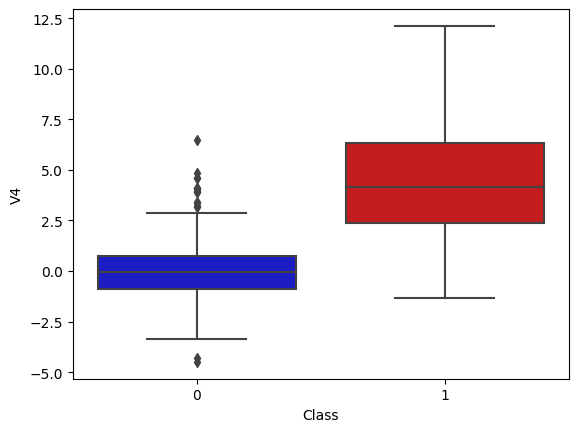

In [148]:
sns.boxplot(x="Class", y='V4', data=x, palette=colors)
set_title('V17 vs Class Negative Correlation')

In [171]:
i, j = divmod(0,3)


0


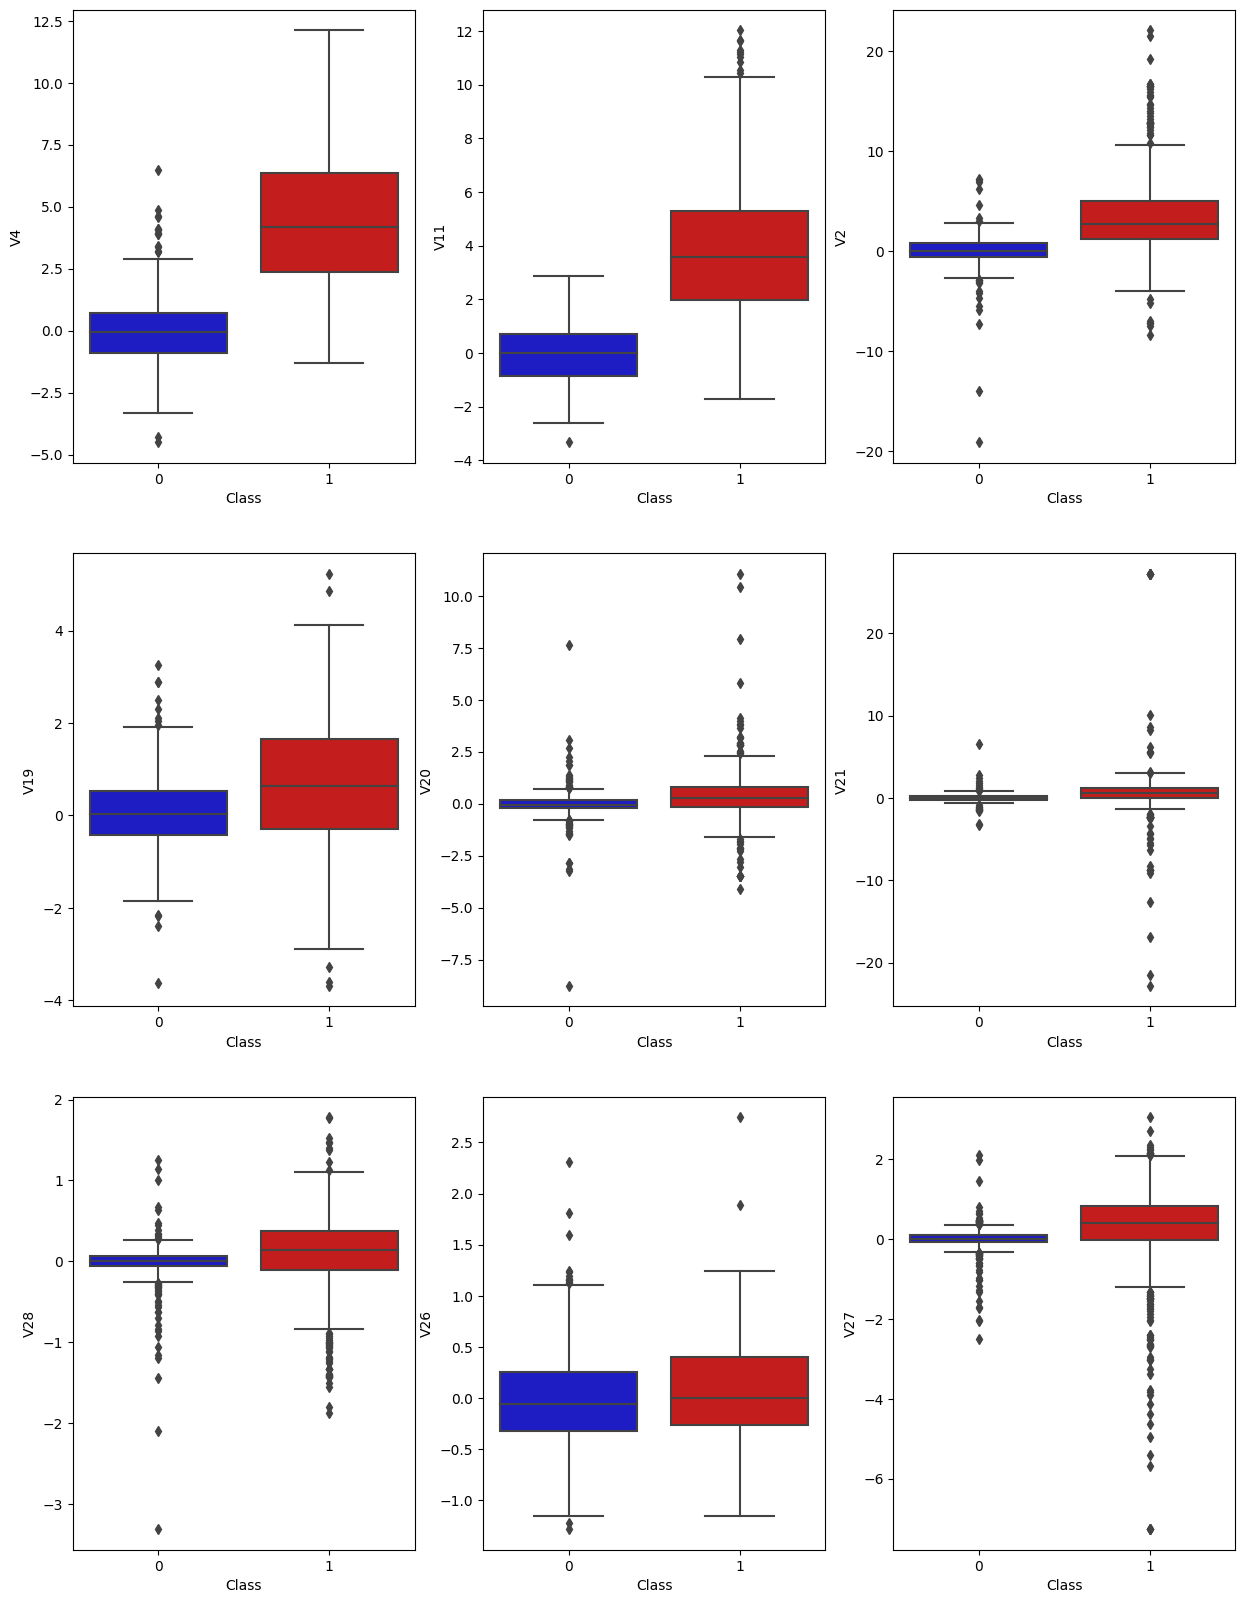

In [186]:
y = 0
f, axes = plt.subplots(round(len(cols)/3), 3, figsize =(15,20))
for i in range(len(cols)):
    z, j = divmod(y, 3)
    #f, ax = plt.subplots(figsize=(5, 3))
    fig = sns.boxplot(x="Class", y=cols[i], data=new_df, palette=colors, ax=axes[z, j])
    y = y + 1
plt.show()

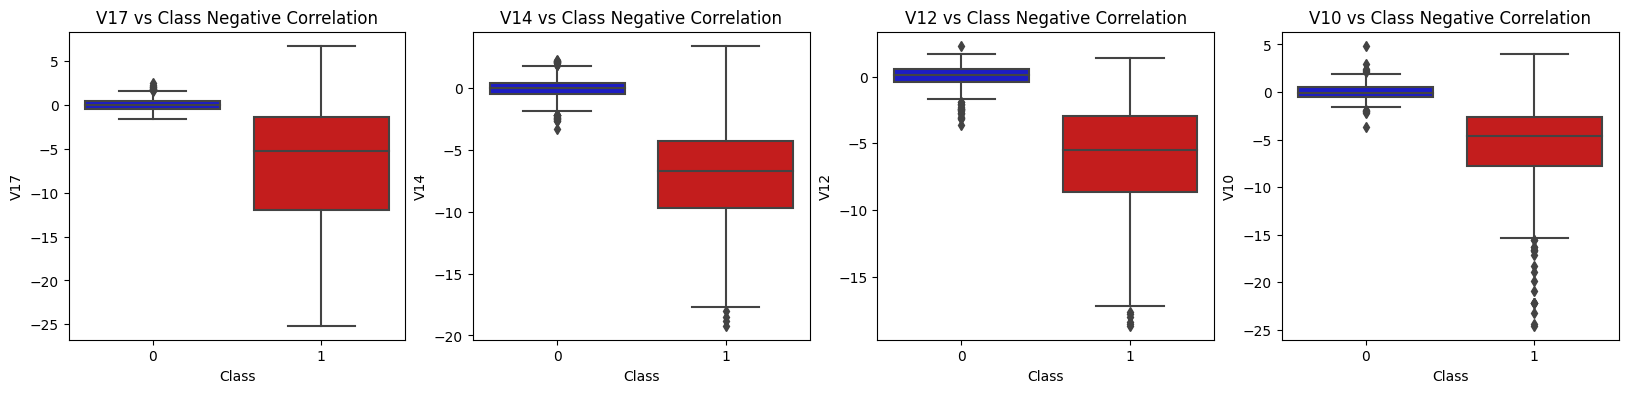

In [33]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [158]:
# Find variables which are highly correlated with the class object

corr[corr['Class']>0]['Class'].sort_values().tail()

V19      0.255667
V2       0.505503
V11      0.688873
V4       0.704454
Class    1.000000
Name: Class, dtype: float64

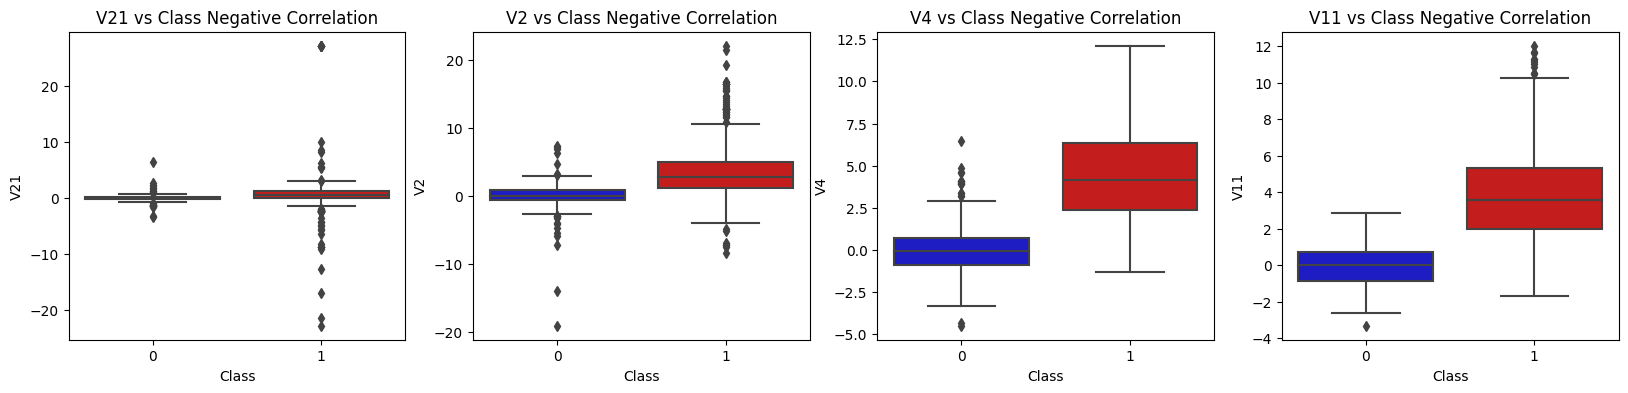

C:\Users\Ankit\AppData\Local\Temp\ipykernel_1064\3313427548.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,  fit=norm, color='#FB8861', ax = axes[z,j])
C:\Users\Ankit\AppData\Local\Temp\ipykernel_1064\3313427548.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,  fit=norm, color='#FB8

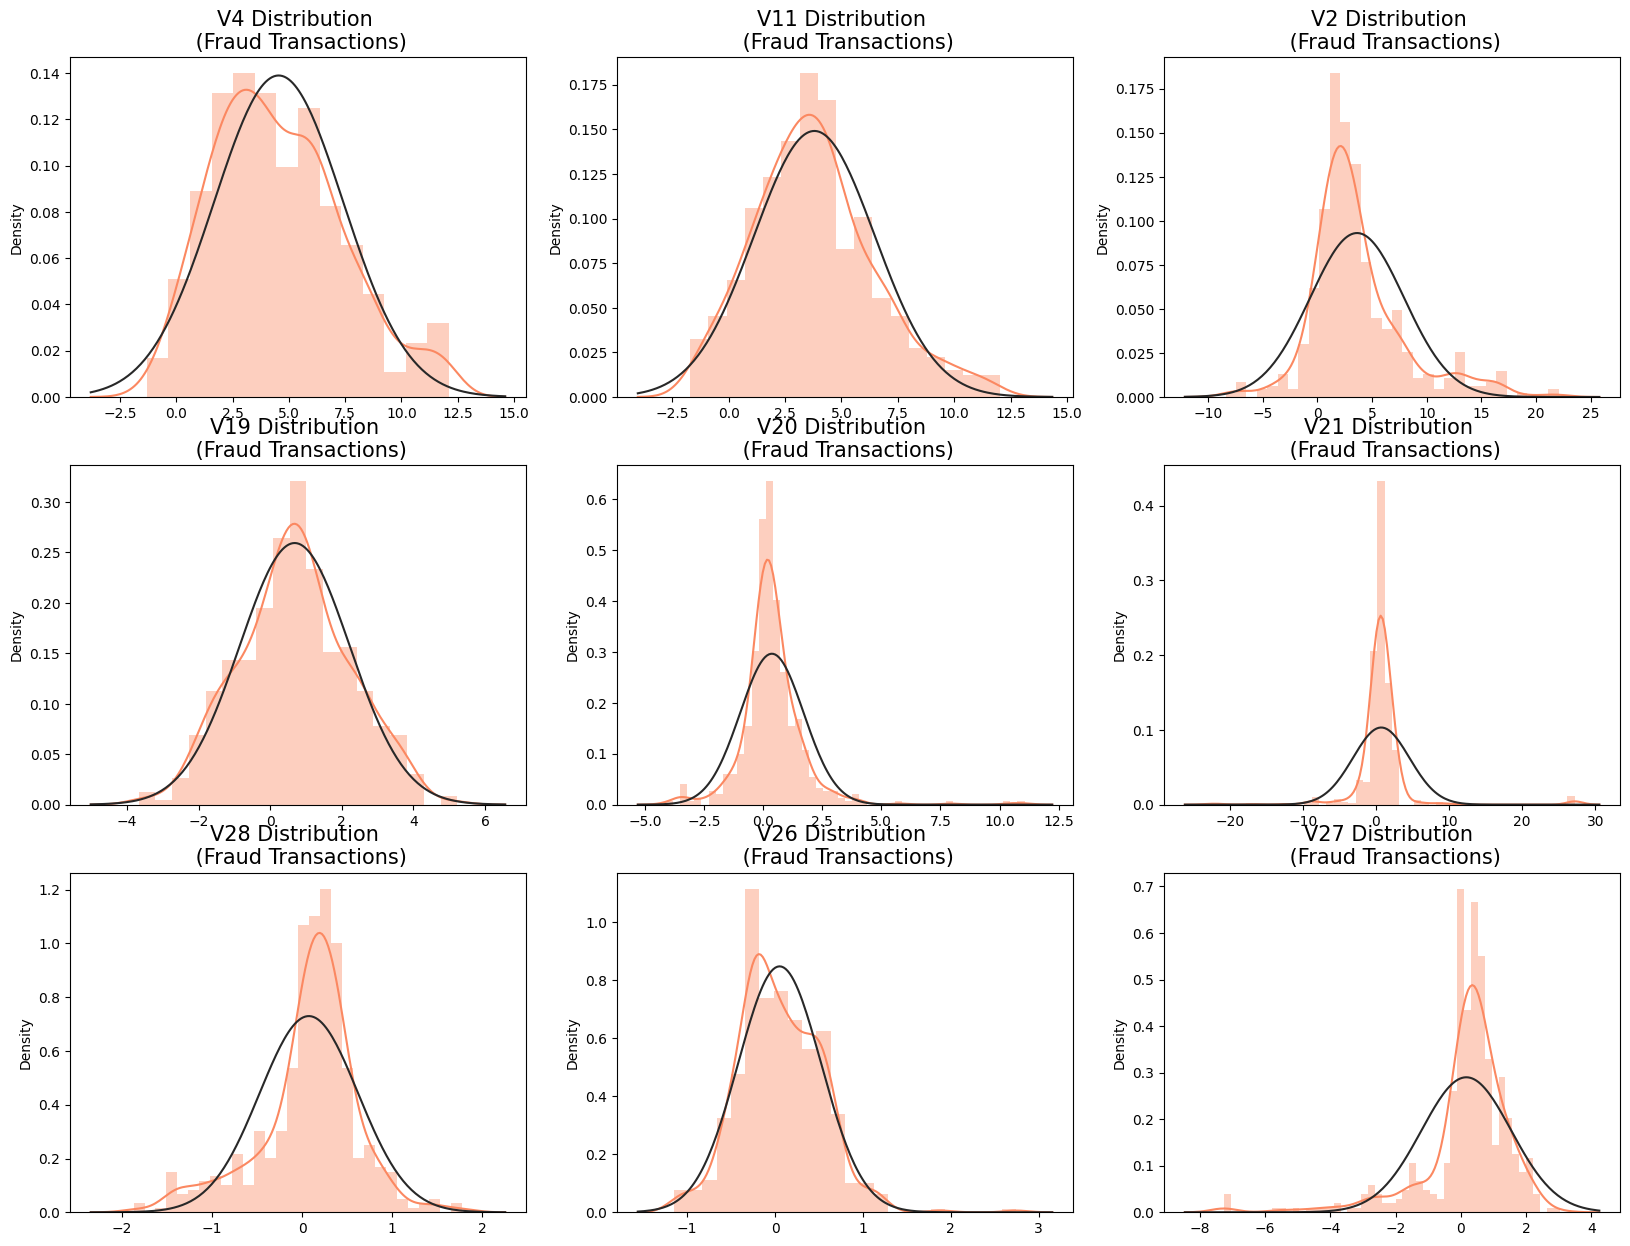

In [203]:
from scipy.stats import norm

y = 0
f, axes = plt.subplots(round(len(cols)/3), 3, figsize =(20,15))
for i in range(len(cols)):
    
    z,j = divmod(y, 3)
    x = new_df[new_df['Class']==1][cols[i]].values
    sns.distplot(x,  fit=norm, color='#FB8861', ax = axes[z,j])
    axes[z,j].set_title('{} Distribution \n (Fraud Transactions)'.format(cols[i]), fontsize=15)
    y+=1

In [218]:
new_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'scaled_time',
       'scaled_amount'],
      dtype='object')

C:\Users\Ankit\AppData\Local\Temp\ipykernel_1064\3492287139.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,  fit=norm, color='#FB8861')


<AxesSubplot: ylabel='Density'>

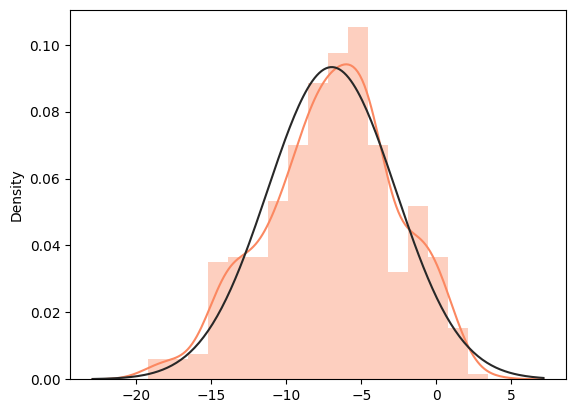

In [226]:
x = new_df[new_df['Class']==1]['V14'].values
sns.distplot(x,  fit=norm, color='#FB8861')

C:\Users\Ankit\AppData\Local\Temp\ipykernel_1064\3237975623.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,  fit=norm, color='#FB8861')


<AxesSubplot: ylabel='Density'>

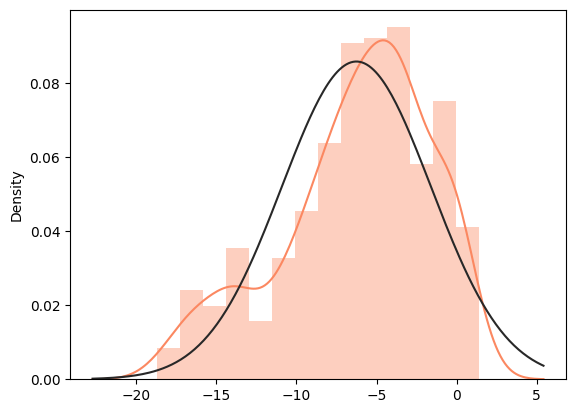

In [227]:
x = new_df[new_df['Class']==1]['V12'].values
sns.distplot(x,  fit=norm, color='#FB8861')

In [212]:
new_df.corr().nlargest(10, 'Class')['Class']

Class            1.000000
V4               0.714352
V11              0.690324
V2               0.490783
V19              0.248487
V20              0.183645
V21              0.130831
V28              0.105510
V27              0.088996
scaled_amount    0.078937
Name: Class, dtype: float64

In [250]:
col = new_df.columns.tolist()
for i in range(len(col)):
    
    print("Checking for {}".format(col[i]))
    y = new_df[new_df['Class'] ==1][col[i]].values
    q25,q75 = np.percentile(y,25), np.percentile(y,75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))

    lower, upper = q25 - (iqr*1.5), q75 + (iqr*1.5)
    print('Cut Off: {}'.format(iqr*1.5))
    print('V14 Lower: {}'.format(lower))
    print('V14 Upper: {}'.format(upper))
    out = [x for x in y if x<lower and x>upper]
    print('Total number of outliers is {}'.format(len(out)))
    print('--')

Checking for V1
Quartile 25: -5.26775974325256 | Quartile 75: -0.234922308660103
iqr: 5.032837434592457
Cut Off: 7.549256151888685
V14 Lower: -12.817015895141246
V14 Upper: 7.3143338432285825
Total number of outliers is 0
--
Checking for V2
Quartile 25: 1.13313858781029 | Quartile 75: 4.14198623236944
iqr: 3.0088476445591503
Cut Off: 4.5132714668387255
V14 Lower: -3.3801328790284355
V14 Upper: 8.655257699208166
Total number of outliers is 0
--
Checking for V3
Quartile 25: -7.40451844591174 | Quartile 75: -2.07791115073952
iqr: 5.32660729517222
Cut Off: 7.98991094275833
V14 Lower: -15.39442938867007
V14 Upper: 5.91199979201881
Total number of outliers is 0
--
Checking for V4
Quartile 25: 2.23799063903423 | Quartile 75: 6.03734512826846
iqr: 3.79935448923423
Cut Off: 5.699031733851346
V14 Lower: -3.4610410948171157
V14 Upper: 11.736376862119805
Total number of outliers is 0
--
Checking for V5
Quartile 25: -3.6637331119316 | Quartile 75: 0.371451592836109
iqr: 4.035184704767709
Cut Off: 6

In [235]:
check_out('V14')

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
0


In [241]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df[new_df['Class'] == 1]['V14'].values
q25, q75 = np.percentile(v14_fraud,25), np.percentile(v14_fraud,75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x <v14_lower and x>v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 0
V10 outliers:[]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [242]:
# -----> V12 removing outliers from fraud transactions

v12_fraud = new_df[new_df['Class'] ==1]['V12'].values
q25, q75 = np.percentile(v12_fraud,25), np.percentile(v12_fraud,75)
v12_iqr = q75-q25
print("IQR for V12 is {}".format(v12_iqr))

v_12_cutt_off = v12_iqr*1.5
v_12_lower, v_12_upper = q25- v_12_cutt_off, q75+v_12_cutt_off
outliers = [x for x in v12_fraud if x < v_12_lower or x > v_12_upper]
print("Outliers for v12 is {}".format(outliers))

new_df = new_df.drop(new_df[(new_df['V12']< v_12_lower) | (new_df['V12']> v_12_upper)].index)

# Removing outliers V10 Feature
v10_fraud = new_df[new_df['Class'] ==1]['V10'].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

IQR for V12 is 5.780002635714835
Outliers for v12 is [-18.5536970096458, -18.6837146333443, -18.4311310279993, -18.0475965708216]
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-22.1870885620007, -15.1241628144947, -16.7460441053944, -15.5637913387301, -15.2399619587112, -15.1237521803455, -17.1415136412892, -20.9491915543611, -16.6496281595399, -15.2399619587112, -14.9246547735487, -15.3460988468775, -18.2711681738888, -24.5882624372475, -18.9132433348732, -22.1870885620007, -14.9246547735487, -15.2318333653018, -16.3035376590131, -15.5637913387301, -16.2556117491401, -24.4031849699728, -16.6011969664137, -19.836148851696, -23.2282548357516, -22.1870885620007, -22.1870885620007]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 945


### Why to use tSNE 

- t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.

- Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)

- This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.

In [262]:
# New_df is from the random undersample data (fewer instances)
import time

X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.1e+01 s
PCA took 0.031 s
Truncated SVD took 0.016 s


In [267]:
X_reduced_tsne[:0]

array([], shape=(0, 2), dtype=float32)

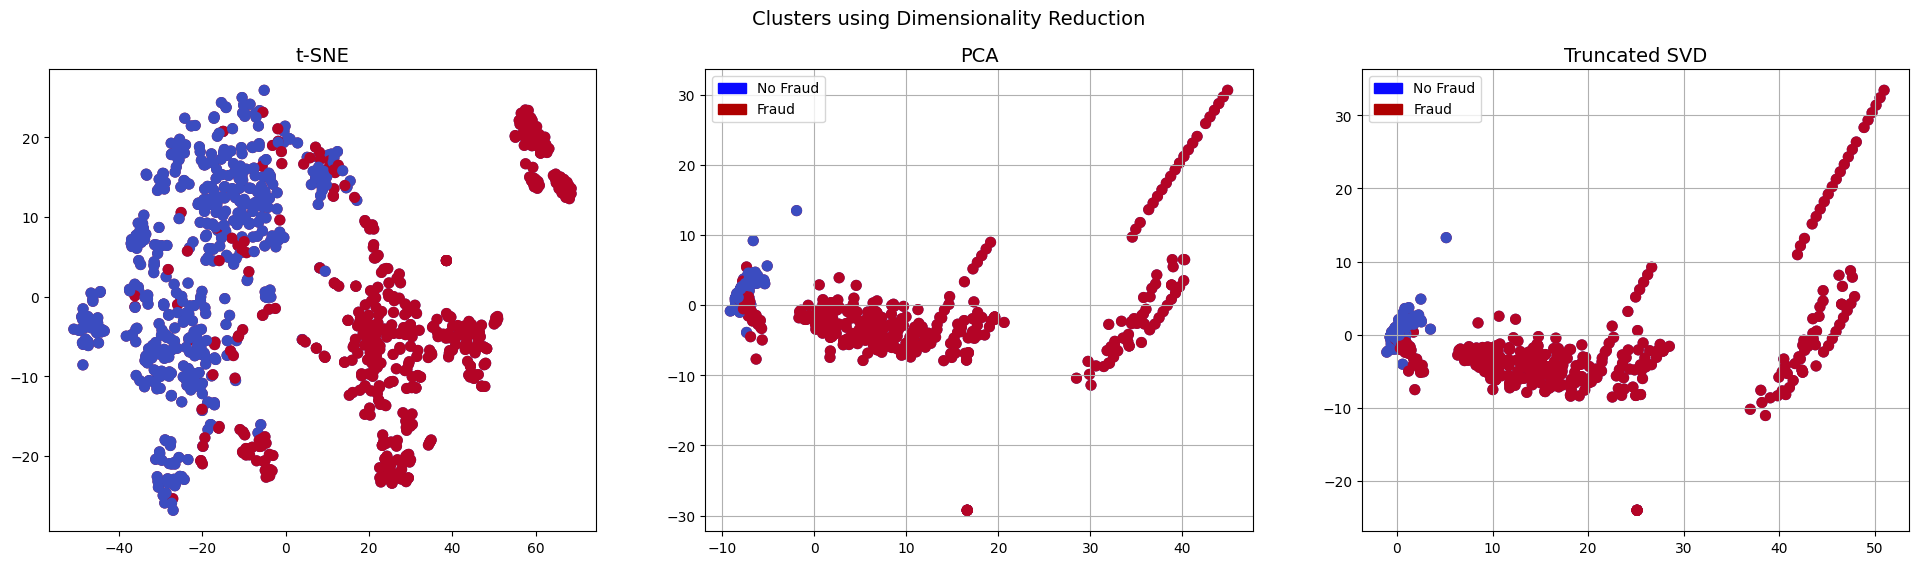

In [270]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()


In [271]:
X = new_df.drop("Class", axis =1)
y = new_df['Class']

In [273]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [274]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [275]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [281]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [280]:
# our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    r2_test = round(classifier.score(X_test,y_test),2)
    r2_train = round(classifier.score(X_train,y_train),2)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)

    print("Classifier:", classifier.__class__.__name__, "Has a r2 of {} for train".format(r2_train))
    print("Classifier:", classifier.__class__.__name__, "Has a r2 of {} for test".format(r2_test))
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier: LogisticRegression Has a r2 of 0.96 for train
Classifier: LogisticRegression Has a r2 of 0.94 for test
Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifier: KNeighborsClassifier Has a r2 of 0.95 for train
Classifier: KNeighborsClassifier Has a r2 of 0.93 for test
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifier: SVC Has a r2 of 0.95 for train
Classifier: SVC Has a r2 of 0.92 for test
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifier: DecisionTreeClassifier Has a r2 of 1.0 for train
Classifier: DecisionTreeClassifier Has a r2 of 0.87 for test
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [ ]:
LogisticRegression().fit()

In [282]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


C:\Users\Ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [283]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  94.44%
Knears Neighbors Cross Validation Score 93.65%
Support Vector Classifier Cross Validation Score 94.05%
DecisionTree Classifier Cross Validation Score 92.99%
